In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [2]:
project = pd.read_csv('Updated data.csv')

In [3]:
project.drop(labels=['Title',"Review"],axis = 1, inplace=True)

In [4]:
project.rename(columns={'clean_Review':'A'})

,Cus_name,Rating,A,clean_Title
0,liane,1,there is an outstanding balance due on this ph...,not unlocked
1,amazon customer,1,not iphone 11 pro max got box that belongs to...,scam
2,marat,1,be carefully it is not new check serial numb...,dona recommend
3,willis,5,this is my review of the 512gb iphone 11 pro m...,great buy great value
4,riddhi,1,the phone doesna t not work the phone turned...,not functioning advertised not buy
...,...,...,...,...
10459,shreya,4,dhamaka,dhamaka phone
10460,murali hv,4,goodbye,good
10461,manish,5,nothing,fantabulous phone easy use
10462,basil john p,5,superbb,fantastic


In [5]:
from wordcloud import WordCloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords 

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['iphone','phone','good','came']
stopwords.extend(newStopWords)

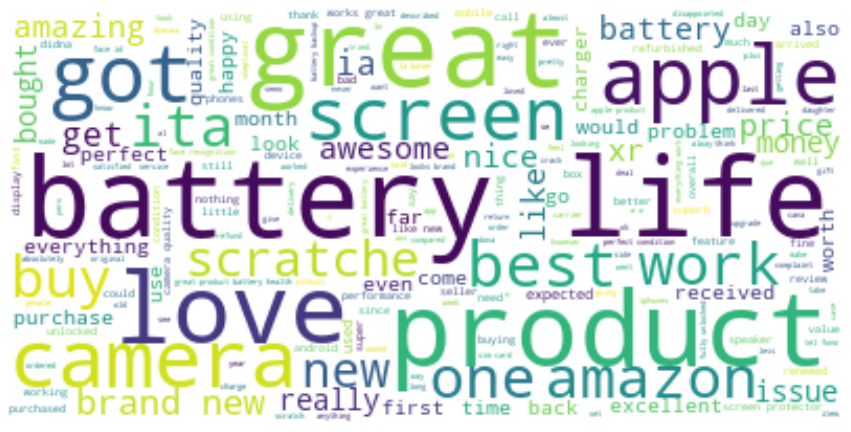

In [6]:
text = " ".join(i for i in project.clean_Review)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

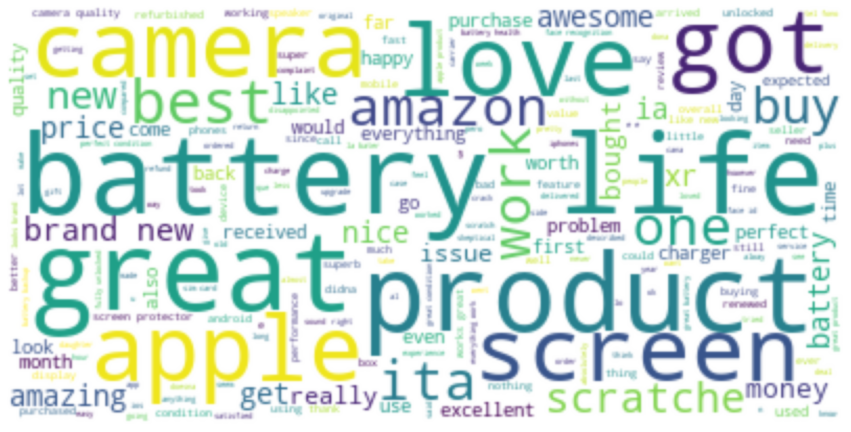

In [7]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
# plt.show()

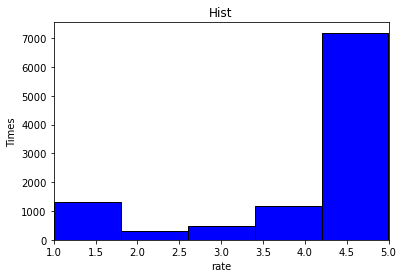

In [8]:
plt.hist(project["Rating"], bins=5,facecolor="blue", edgecolor="black")
plt.xlim(1, 5)
plt.xlabel("rate")
plt.ylabel("Times")
plt.title("Hist")
plt.show()

In [9]:
amazon_data_pos = project[project["Rating"].isin([4,5])]
amazon_data_neg = project[project["Rating"].isin([1,2])]

In [10]:
# amazon_data_pos.shape

In [11]:
# project.query('Rating==4 | Rating==5')

In [12]:
amazon_data_filtered = pd.concat([amazon_data_pos[:20000],amazon_data_neg[:20000]])

In [13]:
amazon_data_filtered.head(5)

,Cus_name,Rating,clean_Review,clean_Title
3,willis,5,this is my review of the 512gb iphone 11 pro m...,great buy great value
6,adalberto,5,usually people buying these products are kind ...,expected
7,leshem amaya mejia,5,the media could not be loaded i understand ...,strongly recommend
9,joy,5,this is a very beautiful iphone it looks bran...,beautiful phone looks brand new
10,a. g. smith,5,this iphone 11 pro max offers rock solid wifi ...,huge improvement iphone xs max


In [14]:
amazon_data_filtered["r"]=1

In [15]:
amazon_data_filtered.head()

,Cus_name,Rating,clean_Review,clean_Title,r
3,willis,5,this is my review of the 512gb iphone 11 pro m...,great buy great value,1
6,adalberto,5,usually people buying these products are kind ...,expected,1
7,leshem amaya mejia,5,the media could not be loaded i understand ...,strongly recommend,1
9,joy,5,this is a very beautiful iphone it looks bran...,beautiful phone looks brand new,1
10,a. g. smith,5,this iphone 11 pro max offers rock solid wifi ...,huge improvement iphone xs max,1


In [16]:
amazon_data_filtered["r"][amazon_data_filtered["Rating"].isin([1,2])] = 0

In [17]:
amazon_data_filtered.tail()

,Cus_name,Rating,clean_Review,clean_Title,r
10376,roshni,1,not worth,bulky,0
10437,amazon customer,1,dont buy,worst experience,0
10446,rp,1,defected piece,defective piece,0
10449,amir khan,1,bad,bad phone,0
10453,padmaraj,1,call quality is worst,poor call quality,0


In [18]:
amazon_data_filtered.head()

,Cus_name,Rating,clean_Review,clean_Title,r
3,willis,5,this is my review of the 512gb iphone 11 pro m...,great buy great value,1
6,adalberto,5,usually people buying these products are kind ...,expected,1
7,leshem amaya mejia,5,the media could not be loaded i understand ...,strongly recommend,1
9,joy,5,this is a very beautiful iphone it looks bran...,beautiful phone looks brand new,1
10,a. g. smith,5,this iphone 11 pro max offers rock solid wifi ...,huge improvement iphone xs max,1


In [19]:
amazon_data_pos=project[project["Rating"].isin([4,5])]
amazon_data_neg=project[project["Rating"].isin([1,2])]

amazon_data_filtered=pd.concat([amazon_data_pos[:20000],amazon_data_neg[:20000]])
amazon_data_filtered["r"]=1
amazon_data_filtered["r"][amazon_data_filtered["Rating"].isin([1,2])]= 0

X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(amazon_data_filtered["clean_Review"],
                                                                   amazon_data_filtered["r"],
                                                                   test_size=0.2,random_state=42)

In [20]:
amazon_data_filtered["clean_Review"]

3        this is my review of the 512gb iphone 11 pro m...
6        usually people buying these products are kind ...
7        the media could not be loaded    i understand ...
9        this is a very beautiful iphone  it looks bran...
10       this iphone 11 pro max offers rock solid wifi ...
                               ...                        
10376                                            not worth
10437                                             dont buy
10446                                       defected piece
10449                                                  bad
10453                                call quality is worst
Name: clean_Review, Length: 9987, dtype: object

In [21]:
count_vector=CountVectorizer(stop_words="english")
count_vector.fit(X_train_data)
X_train_data_new=count_vector.transform(X_train_data)
x_test_data_new=count_vector.transform(x_test_data)

In [22]:
predictions = dict()

In [23]:
count_vector=CountVectorizer(stop_words="english")
count_vector.fit(X_train_data)
X_train_data_new=count_vector.transform(X_train_data)
x_test_data_new=count_vector.transform(x_test_data)

predictions = dict()

def create_model(train_docs, train_y, test_docs, test_y,model_type='svm', stop_words='english', min_df=1, print_result=True, algorithm_para=1.0):
    tfidf_vect = TfidfVectorizer(stop_words=stop_words, min_df=min_df)
    train_result = tfidf_vect.fit_transform(train_docs)
    # SVM
    if model_type == 'svm':
        C = algorithm_para
        clf = svm.LinearSVC(C=C)
        clf.fit(train_result, train_y)
        test_result = tfidf_vect.transform(test_docs)
        # predict
        decision_scores = clf.decision_function(test_result)
        # AUC
        fpr, tpr, thres = roc_curve(test_y, decision_scores)
        # PRC
        precision, recall, thresholds = precision_recall_curve(test_y, decision_scores)
        print('AUC: {:.2%}'.format(auc(fpr, tpr)), 'Average Precision: {:.2%}'.format(auc(recall, precision)))

        # grid search
        
#         param_grid = {'C':np.arange(0.01,5,50)}
#         linearSVC = GridSearchCV(clf,param_grid,cv=5,verbose=2,return_train_score=True)
#         linearSVC.fit(train_result, train_y)
#         print('linearSVC best_params_: ',linearSVC.best_params_)
        
        # plot
        from matplotlib import pyplot as plt
        plt.figure();
        plt.plot(fpr, tpr, color='darkorange', lw=2);
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
        plt.xlim([0.0, 1.0]);
        plt.ylim([0.0, 1.05]);
        plt.xlabel('False Positive Rate');
        plt.ylabel('True Positive Rate');
        plt.title('AUC of SVM');
        plt.show();

        plt.figure();
        plt.plot(recall, precision, color='darkorange', lw=2);
        plt.xlim([0.0, 1.0]);
        plt.ylim([0.0, 1.05]);
        plt.xlabel('Recall');
        plt.ylabel('Precision');
        plt.title('Precision_Recall_Curve of SVM');
        plt.show();

        if print_result == True:
            y_pred = clf.predict(test_result)
            matrix = classification_report(test_y, y_pred)
        else:
            matrix = None
        print(matrix)


    if model_type != 'svm':
        # native Bayes
        # train a multinomial naive Bayes model using the testing data
        clf = MultinomialNB(alpha=algorithm_para).fit(train_result, train_y)
        nb_trans = tfidf_vect.transform(test_docs)
        
        
        if print_result == True:
            y_pred = clf.predict(nb_trans)
            matrix = classification_report(test_y, y_pred)
        else:
            matrix = None
        print(matrix)
        
        
        # predict the news group for the test dataset
        predicted = clf.predict_proba(nb_trans)
        fpr, tpr, thresholds = roc_curve(test_y, predicted[:, 1])
        precision, recall, thresholds = precision_recall_curve(test_y, predicted[:, 1])
        
        # grid search
#         params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
#          }

#         multinomial_nb_grid = GridSearchCV(clf, param_grid=params, n_jobs=-1, cv=5, verbose=5)
#         multinomial_nb_grid.fit(train_result, train_y)
#         print('multinomial_nb_grid best_params_: ',multinomial_nb_grid.best_params_)
        
        ###################
        
        
        
        # calculate auc
        print("AUC: {:.2%}".format(auc(fpr, tpr)), "Average Precision: {:.2%}".format(auc(recall, precision)))
        # plot auc
        from matplotlib import pyplot as plt
        plt.figure();
        plt.plot(fpr, tpr, color='darkorange', lw=2);
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
        plt.xlim([0.0, 1.0]);
        plt.ylim([0.0, 1.05]);
        plt.xlabel('False Positive Rate');
        plt.ylabel('True Positive Rate');
        plt.title('AUC of Naive Bayes Model');
        plt.show();

        # plot precision_recall_curve
        # compute precision/recall by different thresholds
        plt.figure();
        plt.plot(recall, precision, color='darkorange', lw=2);
        plt.xlim([0.0, 1.0]);
        plt.ylim([0.0, 1.05]);
        plt.xlabel('Recall');
        plt.ylabel('Precision');
        plt.title('Precision_Recall_Curve of Naive Bayes Model');
        plt.show();

        # add your code here
    auc_score, prc_score = None, None
    return auc_score, prc_score


AUC: 80.13% Average Precision: 94.14%


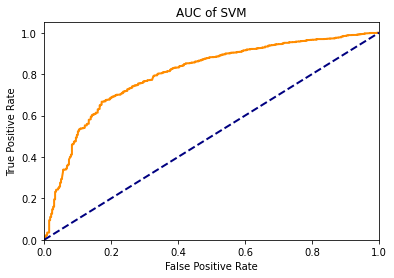

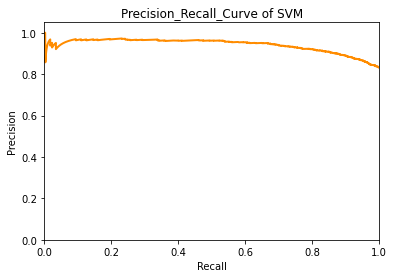

              precision    recall  f1-score   support

           0       0.50      0.34      0.40       338
           1       0.87      0.93      0.90      1660

    accuracy                           0.83      1998
   macro avg       0.69      0.64      0.65      1998
weighted avg       0.81      0.83      0.82      1998



In [24]:
auc_score, prc_socre = create_model(X_train_data, Y_train_data, x_test_data, y_test_data, \
          model_type='svm', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

              precision    recall  f1-score   support

           0       0.53      0.07      0.13       338
           1       0.84      0.99      0.91      1660

    accuracy                           0.83      1998
   macro avg       0.69      0.53      0.52      1998
weighted avg       0.79      0.83      0.77      1998

AUC: 82.08% Average Precision: 95.22%


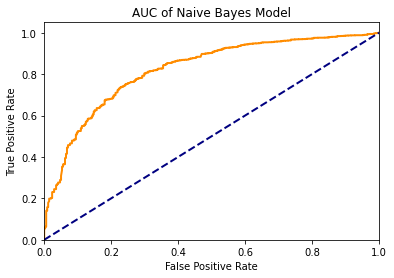

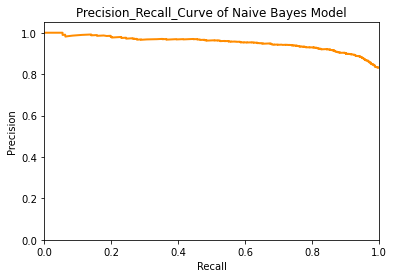

In [25]:
auc_score, prc_socre = create_model(X_train_data, Y_train_data, x_test_data, y_test_data, \
          model_type='NB', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

# Data Imbalance

In [26]:
amazon_data_filtered['r'].value_counts()

1    8380
0    1607
Name: r, dtype: int64

# Feature engineering

# Oversampling Minority Class

In [27]:
class0 = amazon_data_filtered[amazon_data_filtered['r']==0]
class1 = amazon_data_filtered[amazon_data_filtered['r']==1]

In [28]:
class0

,Cus_name,Rating,clean_Review,clean_Title,r
0,liane,1,there is an outstanding balance due on this ph...,not unlocked,0
1,amazon customer,1,not iphone 11 pro max got box that belongs to...,scam,0
2,marat,1,be carefully it is not new check serial numb...,dona recommend,0
4,riddhi,1,the phone doesna t not work the phone turned...,not functioning advertised not buy,0
5,samir,1,horrible buy 1500 hundreds got me a scratch p...,dona waste money people,0
...,...,...,...,...,...
10376,roshni,1,not worth,bulky,0
10437,amazon customer,1,dont buy,worst experience,0
10446,rp,1,defected piece,defective piece,0
10449,amir khan,1,bad,bad phone,0


In [29]:
class1

,Cus_name,Rating,clean_Review,clean_Title,r
3,willis,5,this is my review of the 512gb iphone 11 pro m...,great buy great value,1
6,adalberto,5,usually people buying these products are kind ...,expected,1
7,leshem amaya mejia,5,the media could not be loaded i understand ...,strongly recommend,1
9,joy,5,this is a very beautiful iphone it looks bran...,beautiful phone looks brand new,1
10,a. g. smith,5,this iphone 11 pro max offers rock solid wifi ...,huge improvement iphone xs max,1
...,...,...,...,...,...
10459,shreya,4,dhamaka,dhamaka phone,1
10460,murali hv,4,goodbye,good,1
10461,manish,5,nothing,fantabulous phone easy use,1
10462,basil john p,5,superbb,fantastic,1


In [30]:
len(class0)

1607

In [31]:
len(class1)

8380

In [32]:
from sklearn.utils import resample
# upsample minority
class0_upsampled = resample(class0, # minority sample
                          replace=True, # sample with replacement
                          n_samples=len(class1), # match number in majority class
                          random_state=42) # reproducible results

# # combine majority and upsampled minority
upsampled = pd.concat([class1, class0_upsampled])

# check new class counts
upsampled['r'].value_counts()

1    8380
0    8380
Name: r, dtype: int64

In [33]:
X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(upsampled["clean_Review"],
                                                                   upsampled["r"],
                                                                   test_size=0.2,random_state=42)

In [34]:
x_test_data.shape

(3352,)

In [35]:
y_test_data.shape

(3352,)

AUC: 92.42% Average Precision: 93.52%


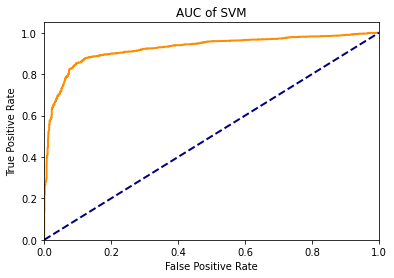

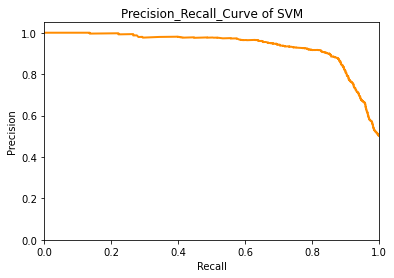

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1675
           1       0.90      0.85      0.87      1677

    accuracy                           0.88      3352
   macro avg       0.88      0.88      0.88      3352
weighted avg       0.88      0.88      0.88      3352



In [36]:
auc_score, prc_socre = create_model(X_train_data, Y_train_data, x_test_data, y_test_data, \
          model_type='svm', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1675
           1       0.83      0.81      0.82      1677

    accuracy                           0.82      3352
   macro avg       0.82      0.82      0.82      3352
weighted avg       0.82      0.82      0.82      3352

AUC: 89.97% Average Precision: 89.71%


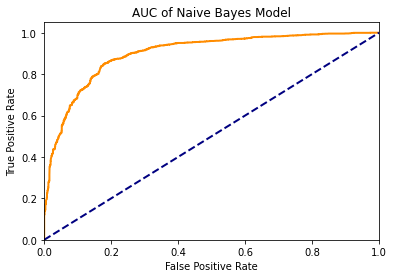

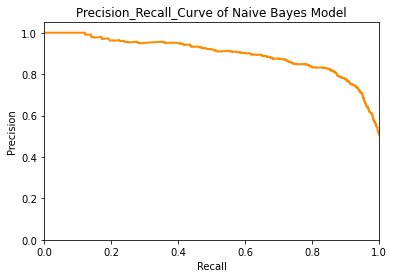

In [37]:
auc_score, prc_socre = create_model(X_train_data, Y_train_data, x_test_data, y_test_data, \
          model_type='NB', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

# Undersampling/down Majority Class

In [38]:
len(class0)

1607

In [39]:
len(class1)

8380

In [40]:
from sklearn.utils import resample
# upsample minority
class1_downsampled = resample(class1, # majority sample
                          replace=False, # sample with replacement
                          n_samples=len(class0), # match number in minority class
                          random_state=42) # reproducible results

# # combine majority and upsampled minority
upsampled = pd.concat([class0, class1_downsampled])

# check new class counts
upsampled['r'].value_counts()

0    1607
1    1607
Name: r, dtype: int64

In [41]:
X_train_data,x_test_data,Y_train_data,y_test_data=train_test_split(upsampled["clean_Review"],
                                                                   upsampled["r"],
                                                                   test_size=0.2,random_state=42)

In [42]:
x_test_data.shape

(643,)

In [43]:
y_test_data.shape

(643,)

AUC: 78.71% Average Precision: 74.43%


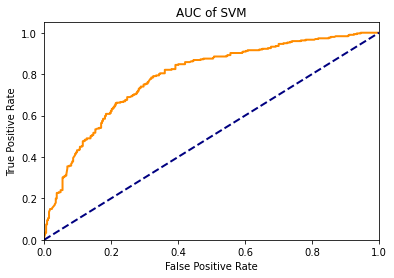

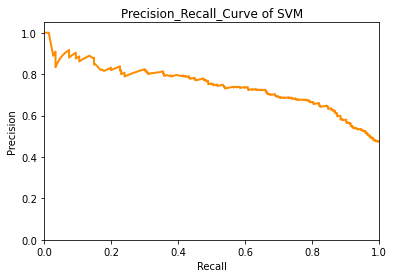

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       347
           1       0.68      0.75      0.71       296

    accuracy                           0.72       643
   macro avg       0.73      0.73      0.72       643
weighted avg       0.73      0.72      0.73       643



In [44]:
auc_score, prc_socre = create_model(X_train_data, Y_train_data, x_test_data, y_test_data, \
          model_type='svm', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       347
           1       0.68      0.80      0.74       296

    accuracy                           0.74       643
   macro avg       0.74      0.74      0.74       643
weighted avg       0.75      0.74      0.74       643

AUC: 81.60% Average Precision: 77.72%


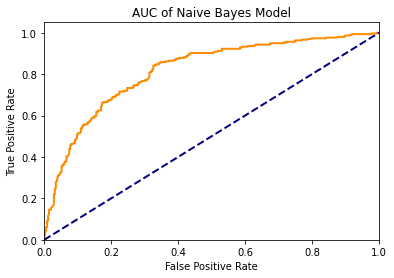

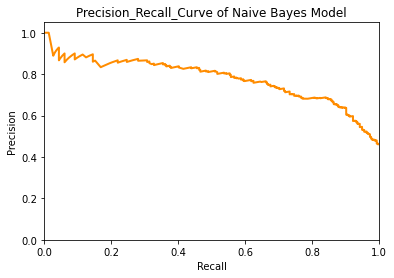

In [45]:
auc_score, prc_socre = create_model(X_train_data, Y_train_data, x_test_data, y_test_data, \
          model_type='NB', stop_words = 'english', min_df = 1, print_result=True, algorithm_para=1.0)

In [46]:
# Read in positive and negative emotional evaluation words
pos_comment = pd.read_csv("positive-words.txt", header=None)
neg_comment = pd.read_csv("negative-words.txt", header=None)

# Combining sentiment words and evaluation words
positive = set(pos_comment.iloc[:,0])
negative = set(neg_comment.iloc[:,0])

In [47]:
positive.intersection(negative)

{'envious', 'enviously', 'enviousness'}

In [48]:
positive & negative 

{'envious', 'enviously', 'enviousness'}

In [49]:
# Read in positive and negative emotional evaluation words
pos_comment = pd.read_csv("positive-words.txt", header=None)
neg_comment = pd.read_csv("negative-words.txt", header=None)

# Combining sentiment words and evaluation words
positive = set(pos_comment.iloc[:,0])
negative = set(neg_comment.iloc[:,0])

# Identical words in positive and negative sentiment vocabulary
intersection = positive & negative  
# remove identical words
positive = list(positive - intersection)
negative = list(negative - intersection)

# Positive words are given an initial weight of 1, and negative words are given an initial weight of -1
positive = pd.DataFrame({"clean_Review":positive,"weight":[1]*len(positive)})
negative = pd.DataFrame({"clean_Review":negative,"weight":[-1]*len(negative)})
posneg = positive.append(negative)
# Merge the word segmentation results with the positive and negative sentiment vocabulary to locate sentiment words
data_posneg = pd.merge(left=project,right=posneg,on='clean_Review',how='left')
data_posneg

,Cus_name,Rating,clean_Review,clean_Title,weight
0,liane,1,there is an outstanding balance due on this ph...,not unlocked,NaN
1,amazon customer,1,not iphone 11 pro max got box that belongs to...,scam,NaN
2,marat,1,be carefully it is not new check serial numb...,dona recommend,NaN
3,willis,5,this is my review of the 512gb iphone 11 pro m...,great buy great value,NaN
4,riddhi,1,the phone doesna t not work the phone turned...,not functioning advertised not buy,NaN
...,...,...,...,...,...
10459,shreya,4,dhamaka,dhamaka phone,NaN
10460,murali hv,4,goodbye,good,NaN
10461,manish,5,nothing,fantabulous phone easy use,NaN
10462,basil john p,5,superbb,fantastic,NaN


In [50]:
data_posneg['weight'].value_counts()

 1.0    488
-1.0     19
Name: weight, dtype: int64

In [51]:
notdict=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor']

data_posneg['id'] = np.arange(0, len(data_posneg))

only_inclination = data_posneg.dropna()  

only_inclination.index = np.arange(0, len(only_inclination))
only_inclination

,Cus_name,Rating,clean_Review,clean_Title,weight,id
0,amazon customer,5,great,great,1.0,353
1,dawn dowlatt,5,great,good phone,1.0,381
2,dennis p. salerno,5,great,iphone,1.0,517
3,abdelmonem nada,5,good,good,1.0,538
4,sandra,5,like,amazing,1.0,581
...,...,...,...,...,...,...
498,amir khan,1,bad,bad phone,-1.0,10449
499,satish k.,5,awesome,worth buy,1.0,10454
500,delux vishram patel,4,awesome,supb,1.0,10456
501,priyanka,5,awesome,2 months review,1.0,10457


In [52]:
np.arange(0, len(data_posneg))

array([    0,     1,     2, ..., 10461, 10462, 10463])

In [53]:
only_inclination["weight"].value_counts()

 1.0    484
-1.0     19
Name: weight, dtype: int64

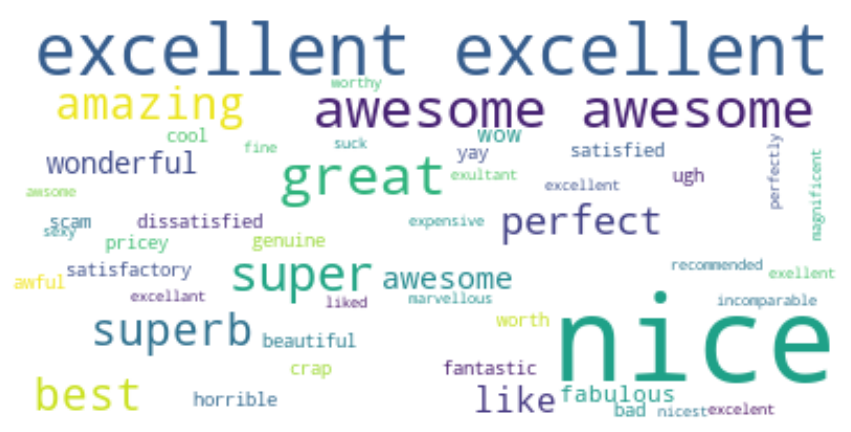

In [54]:
text = " ".join(i for i in only_inclination.clean_Review)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()